(demo_notebooks:measurement:intensity_on_surfaces)=

# Measureing intensity on a surface

This example shows how to measure the intensity of a surface. The surface is defined by a set of points(vertices) and a set of triangles. The intensity is measured by averaging the intensity along the normal vectors of the vertices.

In [1]:
from napari_stress import sample_data, reconstruction, measurements, vectors
import numpy as np
import napari
import napari_process_points_and_surfaces as nppas

## Example data

We first need to create a surface. In this tutorial, we take the 3d image of the 4d droplet sample dataset and quickly reconstruct a surface from it using the [droplet reconstruction toolbox](toolboxes:droplet_reconstruction:from_code).

In [2]:
viewer = napari.Viewer(ndisplay=3)

Assistant skips harvesting pyclesperanto as it's not installed.


In [3]:
droplet = sample_data.get_droplet_4d()[0][0][0]  # take only first timepoint
result = reconstruction.reconstruct_droplet(droplet, voxelsize=np.asarray([2,1,1]),
                                            target_voxelsize=1,
                                            interpolation_method='linear',
                                            resampling_length=1,
                                            return_intermediate_results=False)

points_refined = result[1]
viewer.add_layer(napari.layers.Layer.create(*points_refined))

<Points layer 'points_patch_fitted' at 0x21e2e830310>

We now create surface from the reconstructed points:

In [4]:
surface = nppas.reconstruct_surface_from_pointcloud(points_refined[0], point_influence_radius=3)
surface_smoothed = nppas.smooth_surface(surface, number_of_iterations=50)
surface_decimated = nppas.decimate_quadric(surface_smoothed, fraction=0.01)
viewer.add_surface(surface_decimated, name='surface')

<Surface layer 'surface' at 0x21e390e2460>

We now measure intensity on the surface. The measured values are simply the intensities on the surface. We can add some more metrics (mean, std, min, max) to results:

In [5]:
measured_intensities = measurements.measure_intensity_on_surface(surface_decimated,
                                                                 droplet,
                                                                 measurement_range = 3,
                                                                 sampling_distance=0.5, interpolation_method='linear')

intensity_mean = measured_intensities.mean(axis=1)
intensity_std = measured_intensities.std(axis=1)
intensity_max = measured_intensities.max(axis=1)
intensity_min = measured_intensities.min(axis=1)

measured_intensities['intensity_mean'] = intensity_mean
measured_intensities['intensity_std'] = intensity_std
measured_intensities['intensity_max'] = intensity_max
measured_intensities['intensity_min'] = intensity_min
measured_intensities

step_0    step_1    step_2    step_3    step_4    step_5  \
0          NaN       NaN       NaN       NaN       NaN       NaN   
1     2.073816  1.741672  1.556584  2.061948  2.486952  2.488122   
2          NaN       NaN       NaN       NaN  2.074535  2.380500   
3          NaN       NaN       NaN       NaN       NaN       NaN   
4     1.784309  1.841072  1.959644  2.457736  2.915513  3.132810   
...        ...       ...       ...       ...       ...       ...   
3817  1.438423  1.358750  1.148286  1.165844  1.228114  1.679308   
3818  1.406055  1.423770  1.353826  1.381173  1.443050  1.847044   
3819  1.049756  1.598631  2.340689  2.515378  2.466083  2.561888   
3820  1.030905  1.653047  2.326920  2.521014  2.592958  2.664872   
3821  1.012986  1.195145  1.533043  1.718693  1.795250  2.158125   

      intensity_mean  intensity_std  intensity_max  intensity_min  
0                NaN            NaN            NaN            NaN  
1           2.068182       0.379508       2.488122       1.556584  
2           2.227518       0.216350       2.380500       2.074535  
3                NaN            NaN            NaN            NaN  
4           2.348514       0.578892       3.132810       1.784309  
...              ...            ...            ...            ...  
3817        1.336454       0.202334       1.679308       1.148286  
3818        1.475820       0.184552       1.847044       1.353826  
3819        2.088737       0.621522       2.561888       1.049756  
3820        2.131619       0.652314       2.664872       1.030905  
3821        1.568874       0.417343       2.158125       1.012986  

[3822 rows x 10 columns]

In [6]:
viewer.add_surface((surface_decimated[0], surface_decimated[1], measured_intensities['intensity_max'].values),
                   name='surface_intensity_max', colormap='inferno')

<Surface layer 'surface_intensity_max' at 0x21e39e71760>

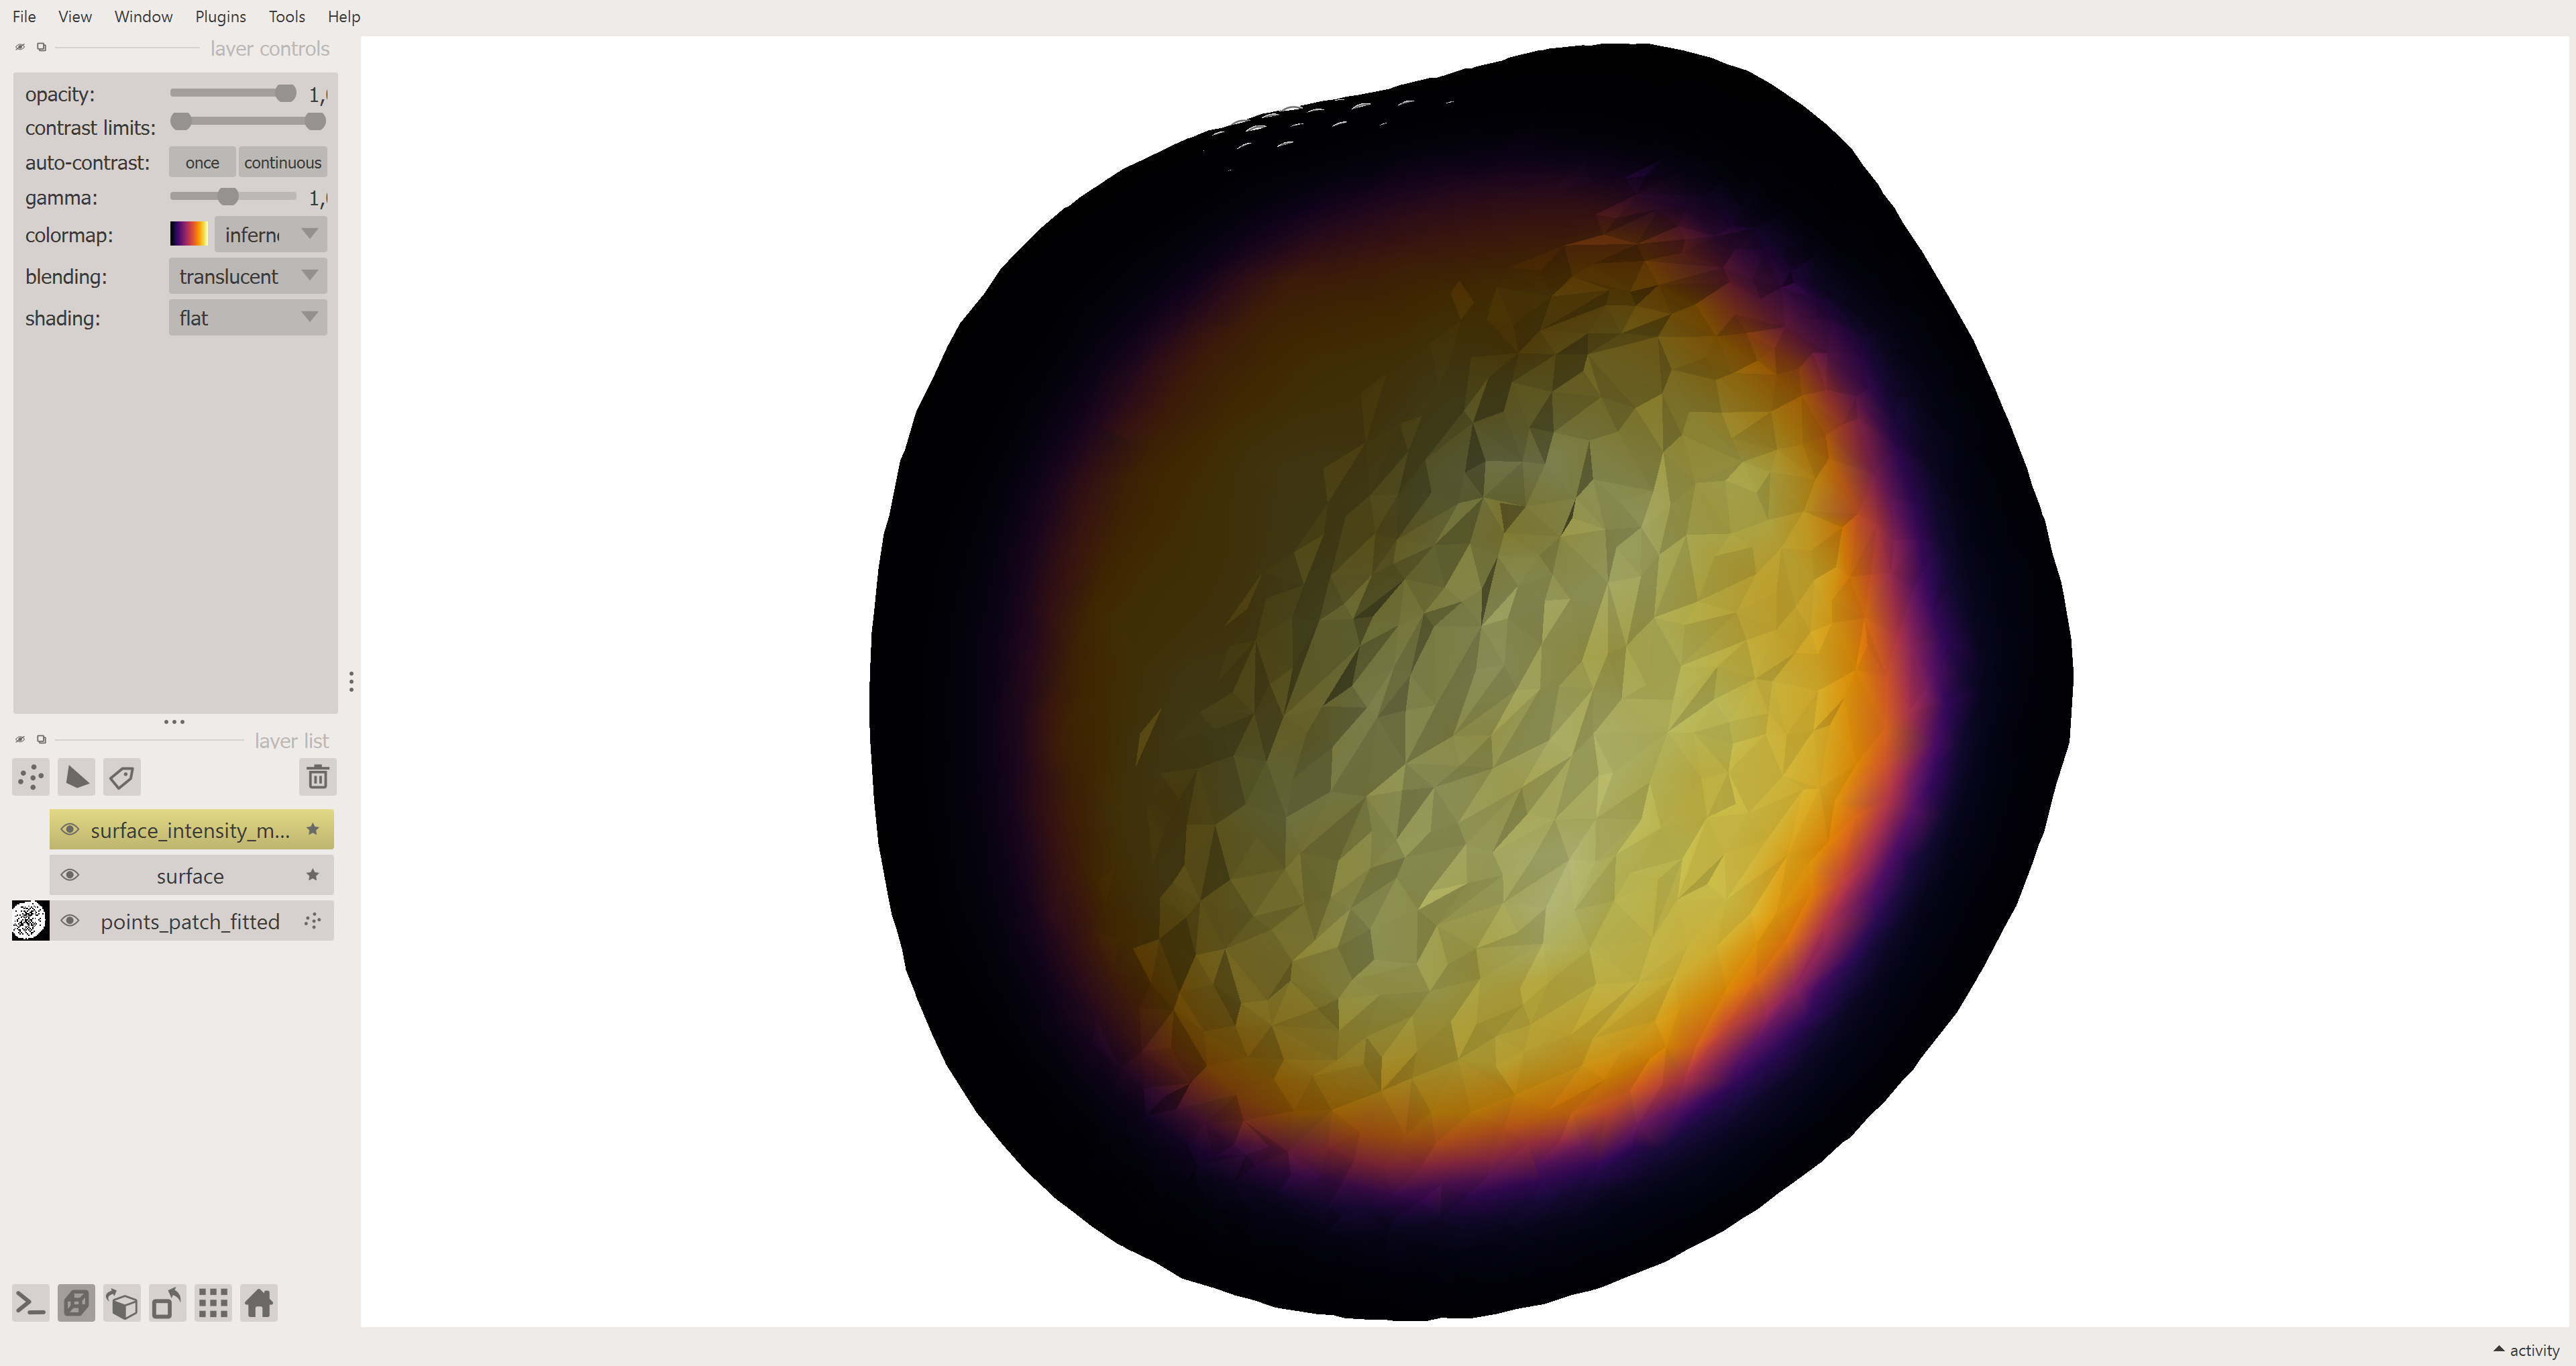

In [7]:
napari.utils.nbscreenshot(viewer)